<a href="https://colab.research.google.com/github/vifirsanova/hse-python-course/blob/main/pandas/visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загружаем Титаник

In [1]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Быстрый анализ числовых данных

In [2]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Быстрый анализ типов данных

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**Гистограмма**

Matplotlib - простая диаграмма

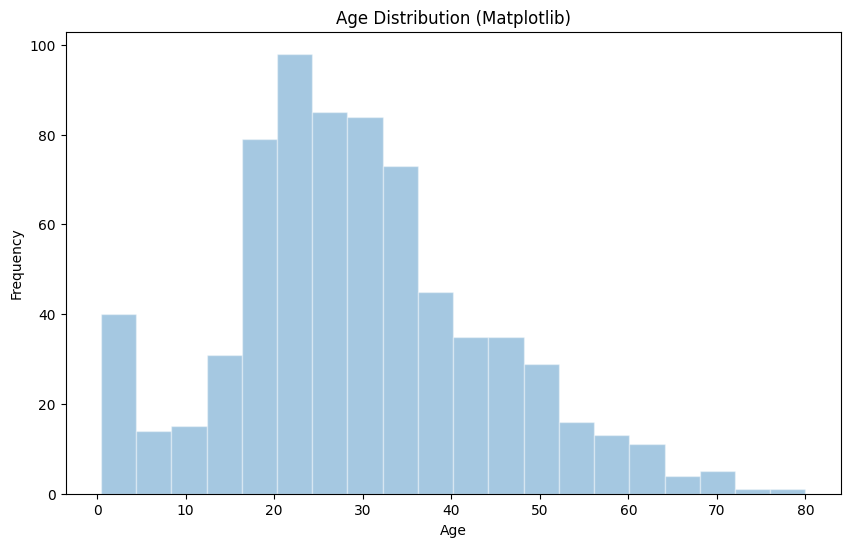

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(titanic['age'].dropna(), bins=20, edgecolor='w', alpha=0.4)
plt.title('Age Distribution (Matplotlib)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

То же с Seaborn

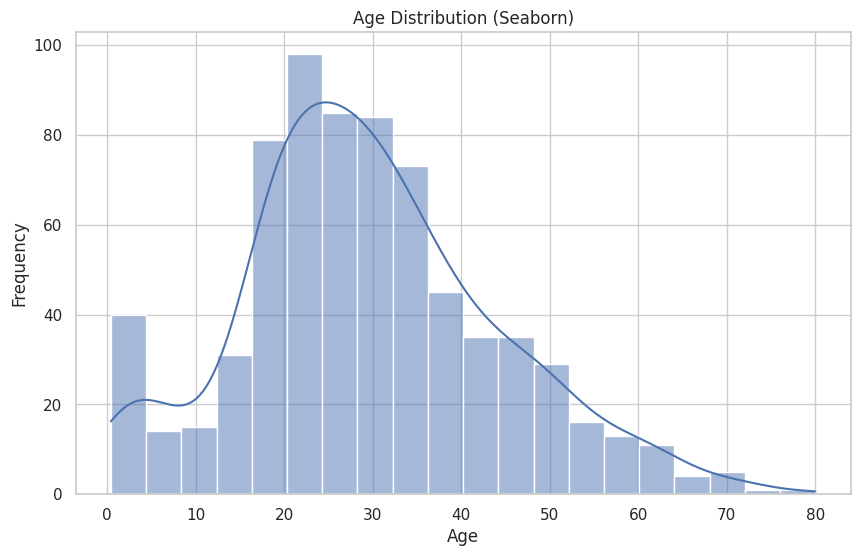

In [15]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution (Seaborn)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Столбчатая диаграмма**

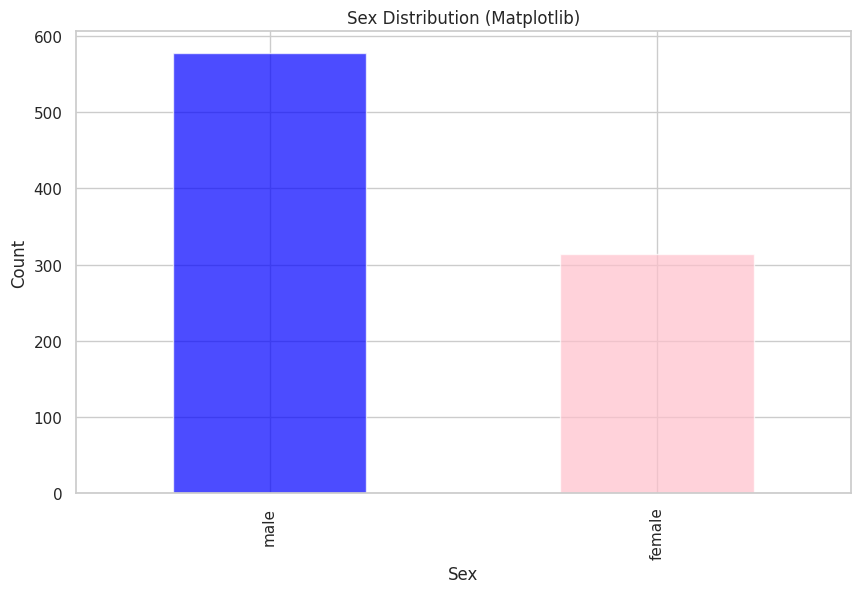

<ipython-input-21-24cd4dced04d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=titanic, palette=['blue', 'pink'])


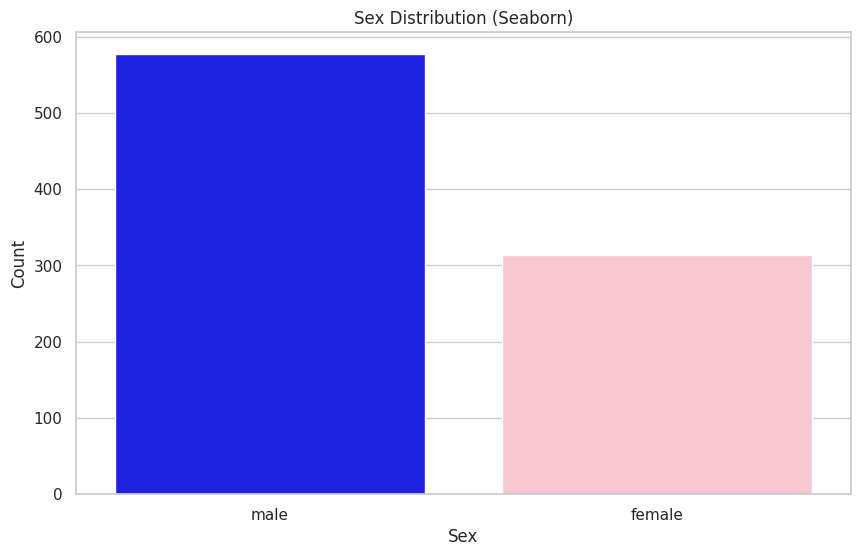

In [21]:
# Matplotlib
plt.figure(figsize=(10, 6))
titanic['sex'].value_counts().plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title('Sex Distribution (Matplotlib)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=titanic, palette=['blue', 'pink'])
plt.title('Sex Distribution (Seaborn)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

**Точечная диаграмма**

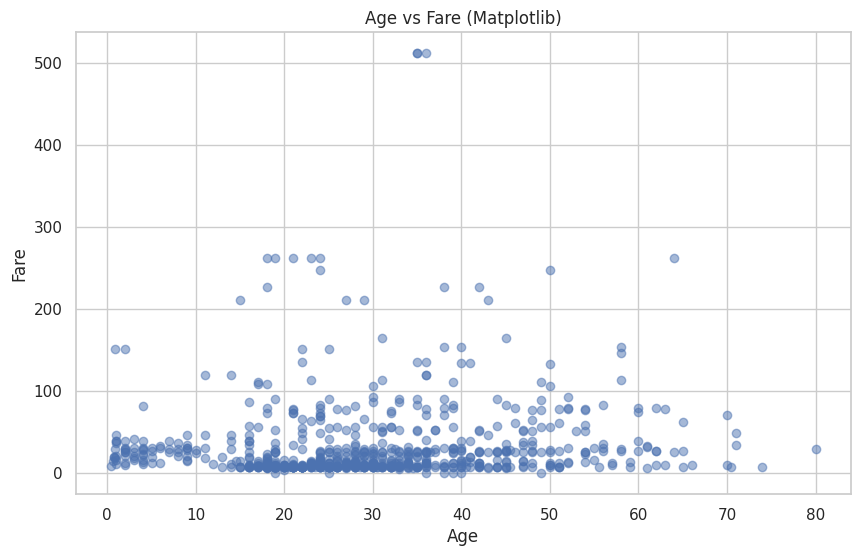

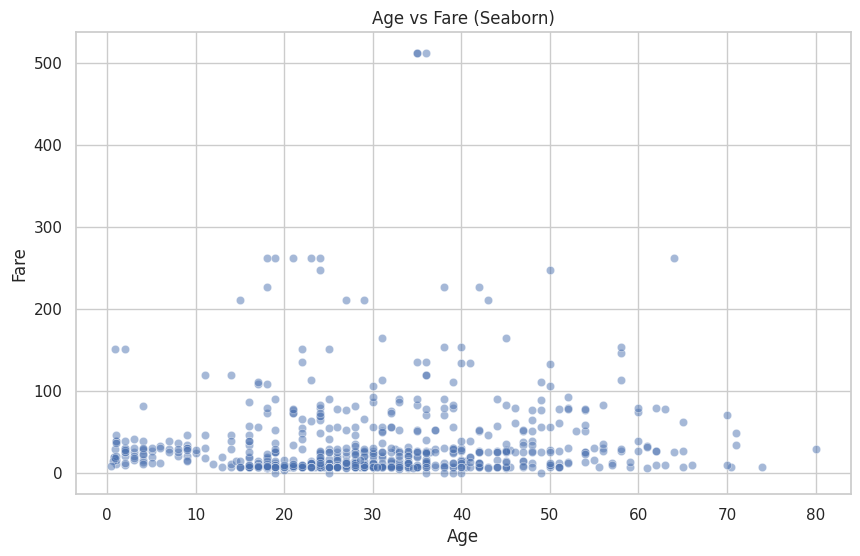

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(titanic['age'], titanic['fare'].dropna(), alpha=0.5)
plt.title('Age vs Fare (Matplotlib)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', data=titanic, alpha=0.5)
plt.title('Age vs Fare (Seaborn)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

**Ящик с усами**

<Figure size 1000x600 with 0 Axes>

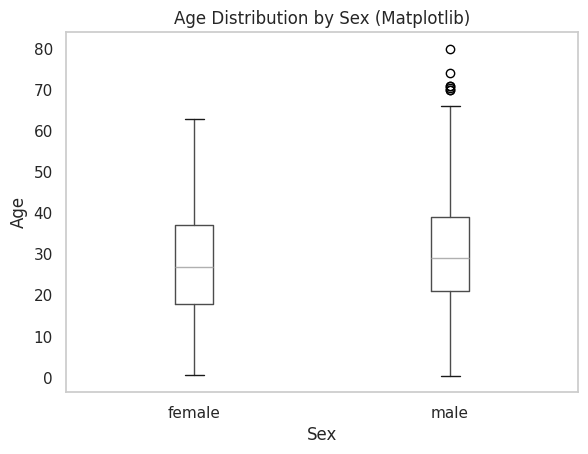

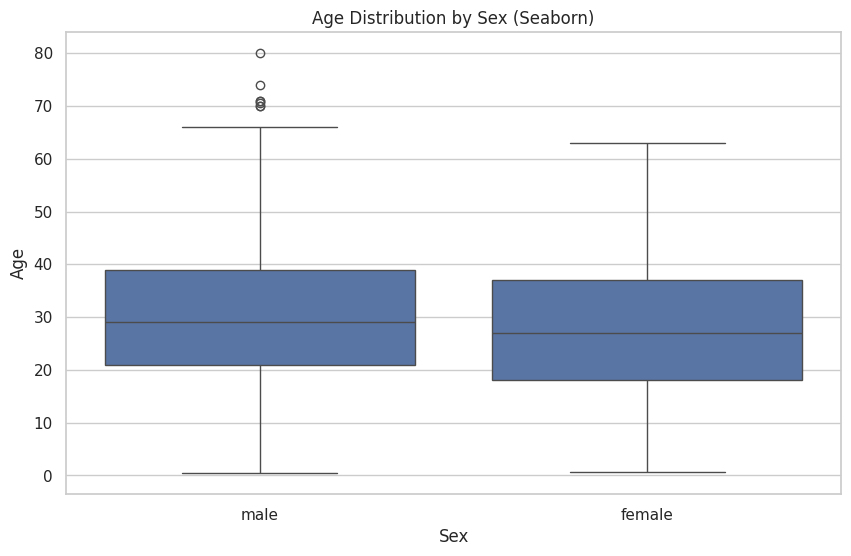

In [30]:
# Matplotlib
plt.figure(figsize=(10, 6))
titanic.boxplot(column='age', by='sex', grid=False)
plt.title('Age Distribution by Sex (Matplotlib)')
plt.suptitle('')  # Remove the default title
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

# Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=titanic)
plt.title('Age Distribution by Sex (Seaborn)')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

**Сравнительный анализ**

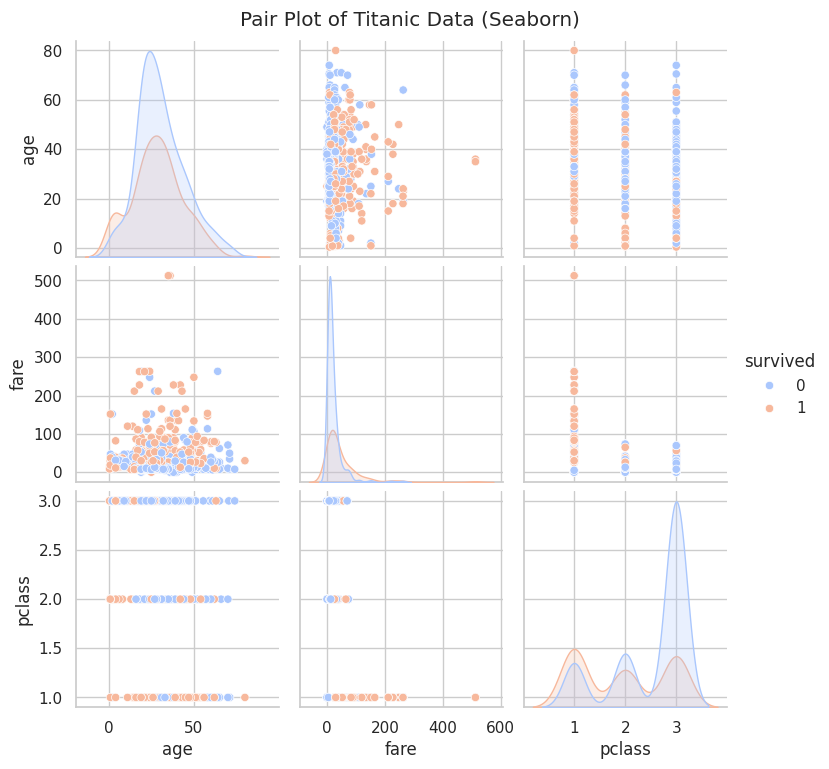

In [31]:
sns.pairplot(titanic, hue='survived', vars=['age', 'fare', 'pclass'], palette='coolwarm')
plt.suptitle('Pair Plot of Titanic Data (Seaborn)', y=1.02)
plt.show()

Кореллограмма

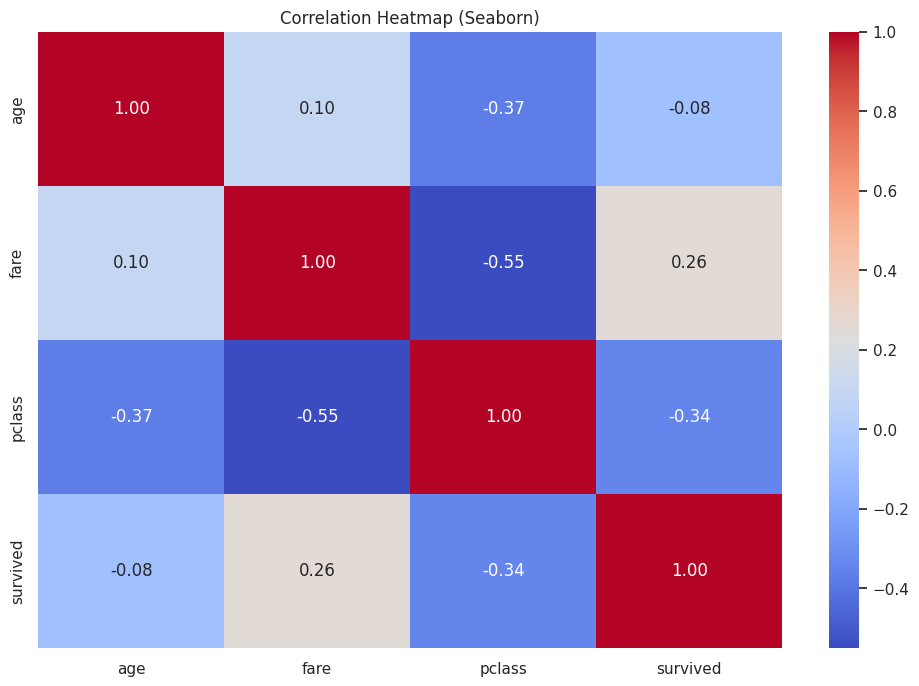

In [37]:
plt.figure(figsize=(12, 8))
corr = titanic[['age', 'fare', 'pclass', 'survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Seaborn)')
plt.show()

Библиотека **plotly**

In [39]:
import plotly.express as px

fig = px.scatter(titanic, x='age', y='fare', color='sex', size='pclass', title='Age vs Fare (Plotly)', labels={'age': 'Age', 'fare': 'Fare'})
fig.show()

In [40]:
fig = px.box(titanic, x='sex', y='age', title='Age Distribution by Sex (Plotly)', labels={'sex': 'Sex', 'age': 'Age'})
fig.show()